In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
mnist_train=datasets.MNIST(root='mnist_data', 
                           train=True,
                           download=True,
                           transform=transforms.Compose([transforms.ToTensor()]))
mnist_test=datasets.MNIST(root='mnist_data', 
                           train=False,
                           download=True,
                           transform=transforms.Compose([transforms.ToTensor()]))

In [3]:
print(mnist_train)
print(mnist_test)

Dataset MNIST
    Number of datapoints: 60000
    Root location: mnist_data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )
Dataset MNIST
    Number of datapoints: 10000
    Root location: mnist_data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )


In [4]:
print(mnist_train.data.shape)
print(mnist_train.targets.shape)
print(mnist_test.data.shape)
print(mnist_test.targets.shape)

torch.Size([60000, 28, 28])
torch.Size([60000])
torch.Size([10000, 28, 28])
torch.Size([10000])


In [5]:
mnist_train.data[1]
mnist_train.targets[1]

tensor(0)

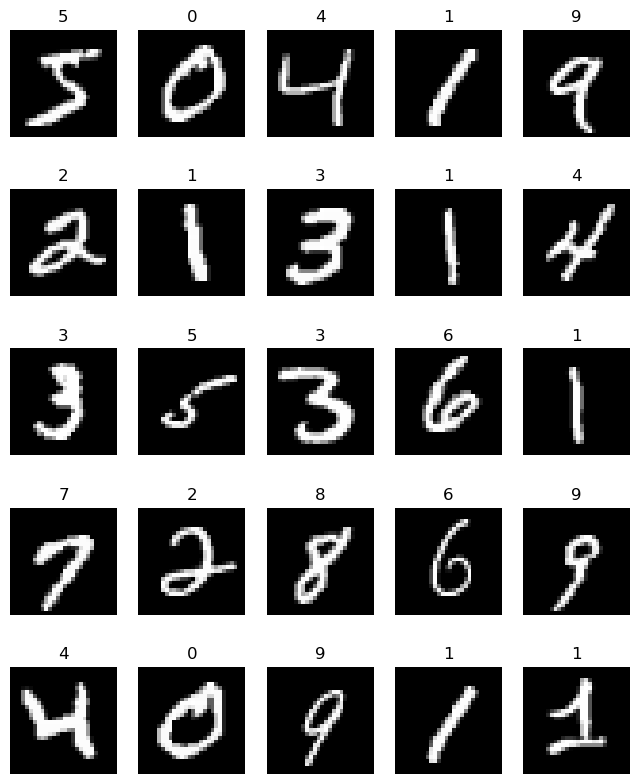

In [6]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

def plot(x,y):
    plt.figure(figsize=(8,10))
    for i in range(len(x)):
        plt.subplot(5,5, i+1)
        img=(np.array(x[i], dtype='float')).reshape(28,28)
        plt.title(y[i].item())
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.show()

plot(mnist_train.data[:25], mnist_train.targets[:25])

In [7]:
mnist_train.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [8]:
x=mnist_train.data.float()/255 # 이미지 데이터가 0~1 값으로 변환
y=mnist_train.targets
x=x.view(x.size(0),-1) # 3차원 ->2차원으로 변환
x.size()
input_size=x.size(-1)
print(input_size)
output_size=int(max(y))+1
print(output_size)

784
10


In [9]:
ratio=[0.8,0.2]
train_cnt=int(x.size(0)*ratio[0]) # 60000*0.8
valid_cnt=int(x.size(0)*ratio[1]) # 60000*0.2
test_cnt=len(mnist_test)
print(train_cnt, valid_cnt, test_cnt)
cnts=[train_cnt, valid_cnt]

48000 12000 10000


In [10]:
indices=torch.randperm(x.size(0))
print(indices)
x=torch.index_select(x, dim=0, index=indices)
y=torch.index_select(y, dim=-1, index=indices)
#print(y[0])
x1=list(x.split(cnts, dim=0))
y1=list(y.split(cnts, dim=0))
print(x1[0].shape, x1[1].shape, y1[0].shape, y1[1].shape)
x1+=[(mnist_test.data.float()/255).view(test_cnt, -1)]
y1+=[mnist_test.targets]
print(x1[0].shape, x1[1].shape, x1[2].shape, y1[0].shape, y1[1].shape,y1[2].shape)

tensor([59581, 19447,   542,  ...,  7498, 51027, 44057])
torch.Size([48000, 784]) torch.Size([12000, 784]) torch.Size([48000]) torch.Size([12000])
torch.Size([48000, 784]) torch.Size([12000, 784]) torch.Size([10000, 784]) torch.Size([48000]) torch.Size([12000]) torch.Size([10000])


In [11]:
model=nn.Sequential(
    nn.Linear(input_size, 500),
    nn.LeakyReLU(),
    nn.Linear(500, 400),
    nn.LeakyReLU(),
    nn.Linear(400, 300),
    nn.LeakyReLU(),
    nn.Linear(300, 200),
    nn.LeakyReLU(),
    nn.Linear(200, 100),
    nn.LeakyReLU(),
    nn.Linear(100,50),
    nn.LeakyReLU(),
    nn.Linear(50, output_size),
    #nn.LogSoftmax(dim=-1)
)
model

Sequential(
  (0): Linear(in_features=784, out_features=500, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=500, out_features=400, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=400, out_features=300, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=300, out_features=200, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Linear(in_features=200, out_features=100, bias=True)
  (9): LeakyReLU(negative_slope=0.01)
  (10): Linear(in_features=100, out_features=50, bias=True)
  (11): LeakyReLU(negative_slope=0.01)
  (12): Linear(in_features=50, out_features=10, bias=True)
)

In [12]:
crit=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters()) #Adam : lr을 자동 조절

In [13]:
from copy import deepcopy
epochs=1001
batch_size=256

lowest_loss=np.inf
best_model=None
early_stop=50
lowest_epoch=np.inf


In [ ]:
train_history, valid_history=[],[]

for epoch in range(epochs):
    indices=torch.randperm(x1[0].size(0))
    x_=torch.index_select(x1[0], dim=0, index=indices) #train_data_x :훈련이미지
    y_=torch.index_select(y1[0], dim=0, index=indices) #train_data_y : 훈련레이블
    x_=x_.split(batch_size, dim=0) # 48000/256
    y_=y_.split(batch_size, dim=0)

    train_loss, valid_loss=0,0
    y_hat=[]
    for x_i, y_i in zip(x_, y_):  # 횟수 48000/256
        #print(x_i.size(), y_i.size())
        y_hat_i=model(x_i)
        loss=crit(y_hat_i, y_i.squeeze())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss+=float(loss)
    train_loss=train_loss/len(x_)

    with torch.no_grad():
        x_=x1[1].split(batch_size, dim=0)
        y_=y1[1].split(batch_size, dim=0)
        valid_loss=0

        for x_i, y_i in zip(x_, y_): # 횟수 : 12000/256
            y_hat_i=model(x_i)
            loss=crit(y_hat_i, y_i.squeeze())
            valid_loss+=float(loss)

            y_hat+=[y_hat_i]
        valid_loss=valid_loss/len(x_)
    train_history+=[train_loss]
    valid_history+=[valid_loss]

    if epoch%10==0:
        print(epoch, train_loss, valid_loss)

    if valid_loss <= lowest_loss:
        lowest_loss=valid_loss
        lowest_epoch=epoch
        best_model=deepcopy(model.state_dict())
    else:
        if early_stop>0 and lowest_epoch+early_stop < epoch:
            print(f'{lowest_epoch}이후 {early_stop} epoch 증가하는 동안 손실함수 감소 없음')
            break
    
print(f'epoch {lowest_epoch}일때 손실함수 {lowest_loss}가 검증데이터로 가장 낮은 손실함수를 가짐')

0 0.5902104792680513 0.2248239815235138
10 0.027853394488858534 0.09461079418976256
20 0.009168209203400035 0.10524944507298951
30 0.007364982496468694 0.10836582258343697
40 0.010265882670090773 0.11525966124633882
50 0.006600281542829335 0.11150783732374932
4이후 50 epoch 증가하는 동안 손실함수 감소 없음
epoch 4일때 손실함수 0.09367686942061211가 검정데이터로 가장 낮은 손실함수를 가짐


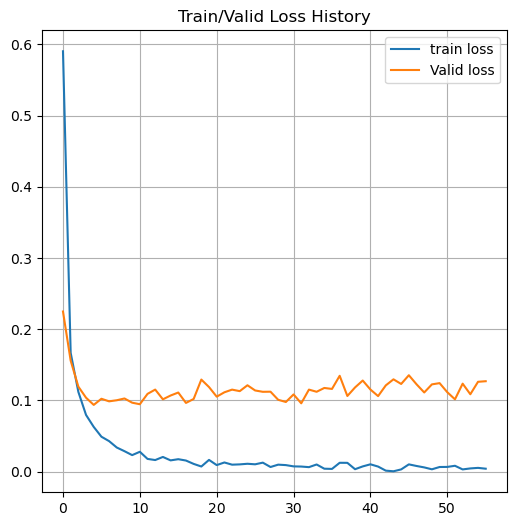

In [16]:
plot_from=0
plt.figure(figsize=(6,6))
plt.grid(True)
plt.title("Train/Valid Loss History")
plt.plot(range(plot_from, len(train_history)), train_history[plot_from:], 
         label="train loss")       
plt.plot(range(plot_from, len(valid_history)), valid_history[plot_from:],
         label='Valid loss')
plt.legend()
plt.show() 


In [22]:
test_loss=0
y_hat=[]
with torch.no_grad():
    x_=x1[-1].split(batch_size, dim=0) #10000/256
    y_=y1[-1].split(batch_size, dim=0)

    for x_i, y_i in zip(x_, y_):
        y_hat_i=model(x_i)
        loss=crit(y_hat_i, y_i.squeeze())
        test_loss+=loss
        y_hat+=[y_hat_i]

test_loss=test_loss/len(x_)
y_hat=torch.cat(y_hat, dim=0)

print('test loss:',test_loss)

test loss: tensor(0.1398)


In [23]:
print(y_hat)

tensor([[-4.7881e+00, -1.0571e+00,  1.0069e+00,  ...,  1.9175e+01,
         -2.5441e+00,  3.3294e+00],
        [-8.5027e+00, -3.2843e-02,  3.1740e+01,  ..., -7.0168e+00,
         -1.0911e+01, -1.2334e+01],
        [-2.9059e+01,  3.0175e+01, -4.4988e+00,  ..., -1.9738e+00,
         -1.2771e+00, -7.2687e+00],
        ...,
        [-2.3090e+01, -1.0388e+00, -6.4394e+00,  ...,  4.8115e+00,
         -2.4490e-01,  2.7652e+00],
        [-1.0335e+01, -2.0264e+01, -3.2868e+01,  ..., -2.9267e+01,
         -6.5585e+00, -8.7965e+00],
        [-3.5689e+00, -5.8480e+00, -1.1367e+01,  ..., -1.9218e+01,
         -9.3993e-02, -2.1568e+01]])


In [25]:
y1[-1].squeeze()

tensor([7, 2, 1,  ..., 4, 5, 6])

In [26]:
torch.argmax(y_hat,dim=-1)

tensor([7, 2, 1,  ..., 4, 5, 6])

In [28]:
correct_cnt=(y1[-1].squeeze()==torch.argmax(y_hat, dim=-1)).sum()
print(correct_cnt/10000)

tensor(0.9821)


In [29]:
import pandas as pd
from sklearn.metrics import confusion_matrix
df=pd.DataFrame(confusion_matrix(y1[-1], torch.argmax(y_hat, dim=-1)))
df

,0,1,2,3,4,5,6,7,8,9
0,966,1,4,0,0,1,2,0,2,4
1,0,1128,1,0,0,0,2,1,3,0
2,2,1,1012,6,1,0,0,3,7,0
3,0,0,4,992,0,3,0,2,6,3
4,0,0,1,0,962,1,4,4,0,10
5,2,0,0,7,0,872,5,0,6,0
6,2,4,2,1,3,2,942,0,2,0
7,0,0,8,3,1,0,0,1012,3,1
8,1,0,3,1,1,3,3,2,959,1
9,2,2,0,3,9,5,0,3,9,976
